In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

import joblib


from sklearn.preprocessing import PolynomialFeatures

In [2]:
train=pd.read_csv('train_ctrUa4K (1).csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
test=pd.read_csv('test_lAUu6dG (1).csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
sample=pd.read_csv('sample_submission_49d68Cx (1).csv')
sample

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [5]:
train.shape

(614, 13)

In [6]:
train.duplicated().sum()

0

In [7]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train[train['Dependents'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [9]:
train.dropna(inplace=True)

In [10]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
train.shape

(480, 13)

In [12]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
train.corr()

C:\Users\radia\AppData\Local\Temp\ipykernel_14960\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


C:\Users\radia\AppData\Local\Temp\ipykernel_14960\2178954303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

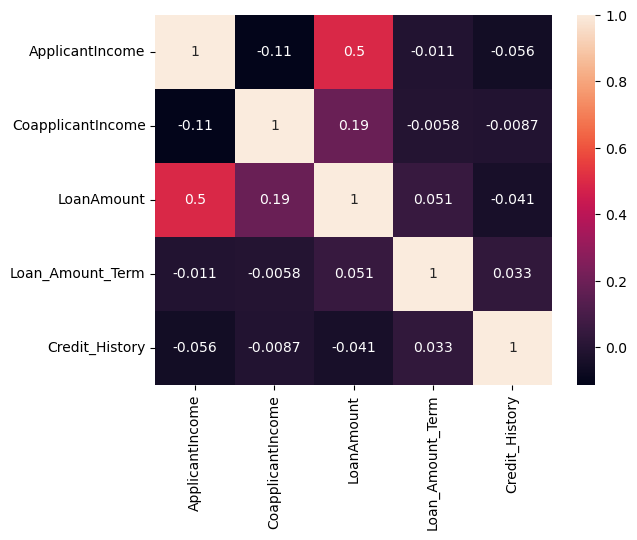

In [14]:
sns.heatmap(train.corr(),annot=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [16]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].astype('int')

In [17]:
train['Credit_History']=train['Credit_History'].astype('int')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    int32  
 10  Credit_History     480 non-null    int32  
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 48.8+ KB


In [19]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
train.duplicated().sum()

0

In [22]:
train.shape

(480, 13)

In [23]:
train['Loan_Status'].replace({'Y':1,'N':0})

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [24]:
train['Loan_Status']=train['Loan_Status'].replace({'Y':1,'N':0})

In [25]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360,1,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180,1,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360,1,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360,1,Urban,1


In [26]:
train.select_dtypes(include=np.number)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,4583,1508.0,128.0,360,1,0
2,3000,0.0,66.0,360,1,1
3,2583,2358.0,120.0,360,1,1
4,6000,0.0,141.0,360,1,1
5,5417,4196.0,267.0,360,1,1
...,...,...,...,...,...,...
609,2900,0.0,71.0,360,1,1
610,4106,0.0,40.0,180,1,1
611,8072,240.0,253.0,360,1,1
612,7583,0.0,187.0,360,1,1


In [27]:
train.select_dtypes(exclude=np.number)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
5,LP001011,Male,Yes,2,Graduate,Yes,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


# Preprocessing

In [28]:
train.select_dtypes(exclude=np.number).drop(columns='Loan_ID')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
5,Male,Yes,2,Graduate,Yes,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [29]:
cat_cols=train.select_dtypes(exclude=np.number).drop(columns='Loan_ID')

In [30]:
encoded_cat=pd.get_dummies(cat_cols)

In [31]:
encoded_cat

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [32]:
num_data=train.select_dtypes(include=np.number)
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,4583,1508.0,128.0,360,1,0
2,3000,0.0,66.0,360,1,1
3,2583,2358.0,120.0,360,1,1
4,6000,0.0,141.0,360,1,1
5,5417,4196.0,267.0,360,1,1
...,...,...,...,...,...,...
609,2900,0.0,71.0,360,1,1
610,4106,0.0,40.0,180,1,1
611,8072,240.0,253.0,360,1,1
612,7583,0.0,187.0,360,1,1


In [33]:
encoded_cat=encoded_cat.reset_index().drop(columns='index')
num_data=num_data.reset_index().drop(columns='index')

In [34]:
data_preprocessed=pd.concat([encoded_cat,num_data],axis=1)
data_preprocessed

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,4583,1508.0,128.0,360,1,0
1,0,1,0,1,1,0,0,0,1,0,...,1,0,0,1,3000,0.0,66.0,360,1,1
2,0,1,0,1,1,0,0,0,0,1,...,0,0,0,1,2583,2358.0,120.0,360,1,1
3,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,6000,0.0,141.0,360,1,1
4,0,1,0,1,0,0,1,0,1,0,...,1,0,0,1,5417,4196.0,267.0,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,2900,0.0,71.0,360,1,1
476,0,1,0,1,0,0,0,1,1,0,...,0,1,0,0,4106,0.0,40.0,180,1,1
477,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,8072,240.0,253.0,360,1,1
478,0,1,0,1,0,0,1,0,1,0,...,0,0,0,1,7583,0.0,187.0,360,1,1


In [35]:
tprep=pd.DataFrame(sample['Loan_ID'])
tprep

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [36]:
data_preprocessed['Loan_Status'].head(367)

0      0
1      1
2      1
3      1
4      1
      ..
362    0
363    1
364    0
365    0
366    1
Name: Loan_Status, Length: 367, dtype: int64

In [37]:
tprep['Loan_Status']=pd.DataFrame(data_preprocessed['Loan_Status'].head(367))

In [38]:
tprep

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,0
363,LP002975,1
364,LP002980,0
365,LP002986,0


In [39]:
tprep['Loan_Status']=tprep['Loan_Status'].replace({1:'Y',0:'N'})

In [40]:
tprep

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,N
363,LP002975,Y
364,LP002980,N
365,LP002986,N


In [41]:
tprep.to_csv('loan_preprocess.csv',index=False)

#  Error for preprocessing : 0.5694444444444444

# Linear regression

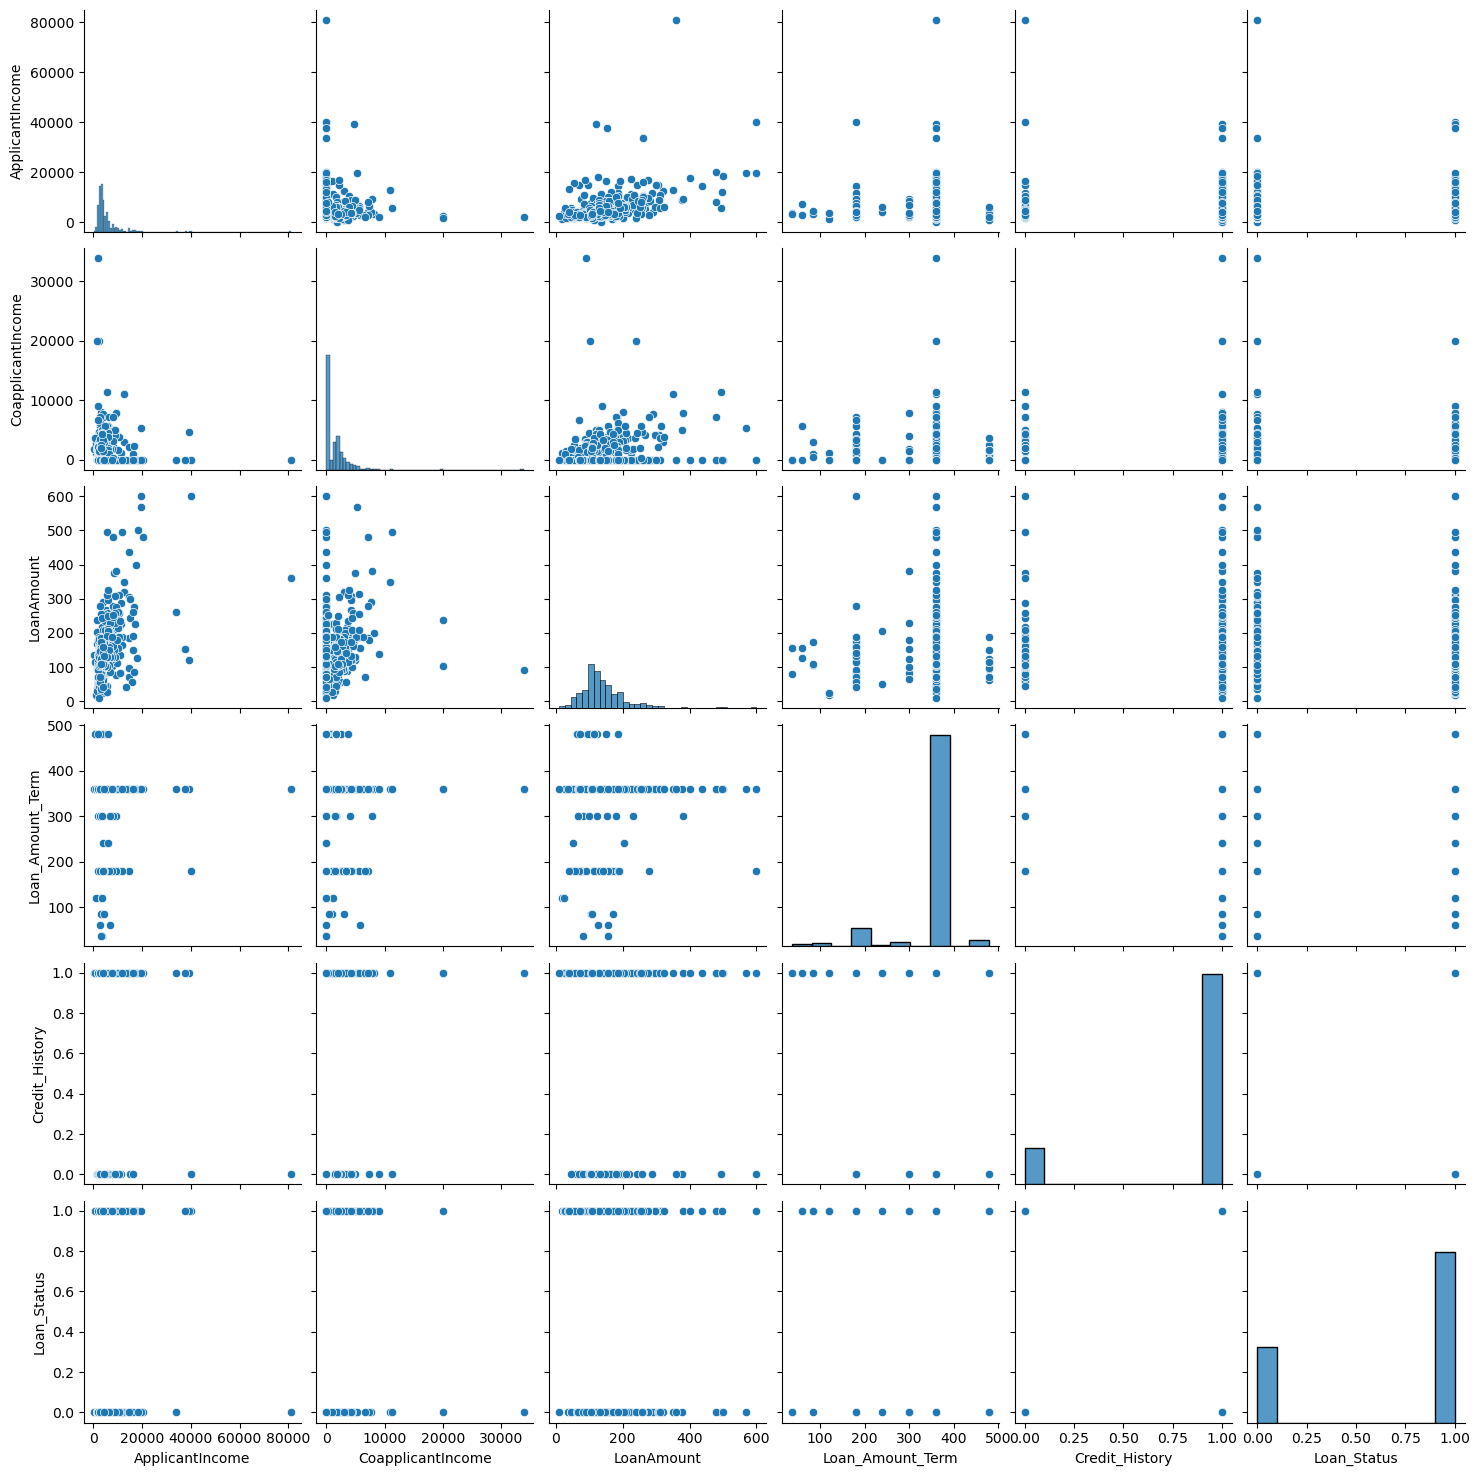

In [42]:
sns.pairplot(train)

In [43]:
[variance_inflation_factor(train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']].values,i) for i in range(train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']].shape[1])]

[2.6663249564288507,
 1.5004121131361454,
 5.965818307069391,
 8.372912209323962,
 8.808757822362539,
 4.500453746839414]

In [44]:
X=train.drop(columns=['Loan_Status','Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
y=train['Loan_Status']

In [45]:
model=LinearRegression()

In [46]:
model.fit(X,y)

LinearRegression()

In [47]:
model.coef_

array([ 3.42828597e-07, -6.29296946e-06, -2.54510529e-04, -1.63775326e-04,
        6.91217540e-01])

In [48]:
model.intercept_

0.20221848415663102

splitting the data into train and test method

In [49]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=2)

In [50]:
train_X.shape,test_X.shape

((336, 5), (144, 5))

In [51]:
train_y

372    1
543    1
39     1
539    1
183    0
      ..
386    1
28     0
91     1
18     0
214    1
Name: Loan_Status, Length: 336, dtype: int64

# Modelling Loan amount vs Loan status

<Axes: xlabel='LoanAmount', ylabel='Loan_Status'>

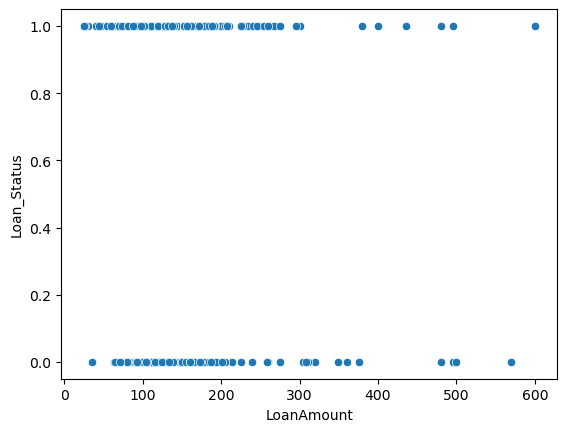

In [52]:
sns.scatterplot(x=train_X['LoanAmount'],y=train_y)

In [53]:
reg=LinearRegression()

In [54]:
reg.fit(train_X[['LoanAmount']],train_y)

LinearRegression()

In [55]:
reg.intercept_

0.8282560177008075

In [56]:
reg.coef_

array([-0.00079563])

#  Loan status prediction for loan amount   
## y=  -0.00079563[ 'Loan amount'] + 0.82825602

In [57]:
train_predict=reg.predict(train_X[['LoanAmount']])

In [58]:
train_predict

array([0.52591475, 0.72641475, 0.74073618, 0.70334133, 0.62139094,
       0.74073618, 0.73914491, 0.73039292, 0.72164094, 0.67390284,
       0.7025457 , 0.7844961 , 0.71527586, 0.64525999, 0.71607149,
       0.75107943, 0.64207745, 0.74232745, 0.62218657, 0.74073618,
       0.73914491, 0.73277983, 0.74073618, 0.586383  , 0.68901991,
       0.70891078, 0.72880165, 0.7025457 , 0.73277983, 0.72482348,
       0.736758  , 0.7208453 , 0.736758  , 0.73834927, 0.67549411,
       0.7025457 , 0.73118856, 0.72482348, 0.4336211 , 0.73277983,
       0.71368459, 0.68185919, 0.74710126, 0.736758  , 0.73834927,
       0.80438697, 0.72800602, 0.73914491, 0.75744451, 0.70811514,
       0.68345046, 0.73039292, 0.79006554, 0.75664887, 0.67947229,
       0.80836514, 0.73039292, 0.73834927, 0.7526707 , 0.74073618,
       0.78370046, 0.73277983, 0.73834927, 0.75664887, 0.74232745,
       0.72004967, 0.73277983, 0.71686713, 0.74869253, 0.73755364,
       0.74312308, 0.69061118, 0.70095443, 0.71686713, 0.72641

Text(0, 0.5, 'Loan_Status')

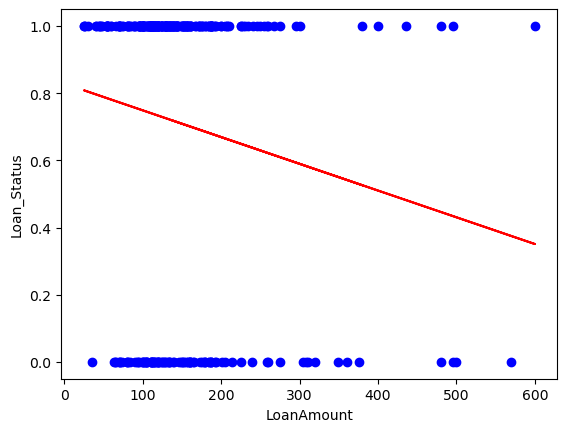

In [59]:
plt.scatter(train_X['LoanAmount'], train_y, color = 'blue')
plt.plot(train_X['LoanAmount'], reg.predict(train_X[['LoanAmount']]), color = 'red')
plt.xlabel("LoanAmount")
plt.ylabel('Loan_Status')

In [60]:
test_predict = reg.predict(test_X[['LoanAmount']])

In [61]:
test_predict

array([0.5704703 , 0.74869253, 0.69936316, 0.76619649, 0.7049326 ,
       0.72721038, 0.78051792, 0.72004967, 0.74232745, 0.73834927,
       0.72880165, 0.7208453 , 0.73198419, 0.66912903, 0.74550999,
       0.72561911, 0.77574411, 0.77494848, 0.75187507, 0.73596237,
       0.71607149, 0.72641475, 0.73118856, 0.75664887, 0.72402784,
       0.79961316, 0.76380959, 0.73277983, 0.76460522, 0.74073618,
       0.72880165, 0.69697626, 0.7049326 , 0.75664887, 0.60547824,
       0.69538499, 0.75187507, 0.78847427, 0.59752189, 0.72800602,
       0.71766276, 0.79165681, 0.78051792, 0.7184584 , 0.62298221,
       0.78847427, 0.72880165, 0.66196832, 0.70891078, 0.72164094,
       0.72641475, 0.62696038, 0.75187507, 0.77494848, 0.65639887,
       0.75664887, 0.7685834 , 0.67947229, 0.74391872, 0.76221832,
       0.72004967, 0.72004967, 0.6842461 , 0.6341211 , 0.73834927,
       0.72164094, 0.79245245, 0.60070443, 0.69299808, 0.71925403,
       0.72482348, 0.68901991, 0.66117268, 0.76778776, 0.77256

Text(0, 0.5, 'Loan_Status')

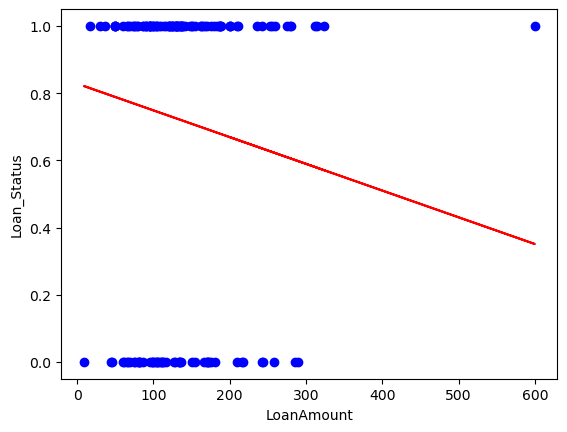

In [62]:
plt.scatter(test_X['LoanAmount'], test_y, color = 'blue')
plt.plot(test_X['LoanAmount'], reg.predict(test_X[['LoanAmount']]), color = 'red')
plt.xlabel("LoanAmount")
plt.ylabel('Loan_Status')

Text(0, 0.5, 'Loan_Status')

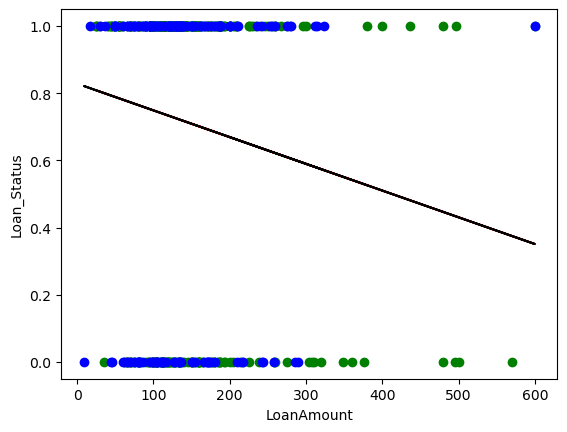

In [63]:
plt.scatter(train_X['LoanAmount'], train_y, color = 'green')
plt.plot(train_X['LoanAmount'], reg.predict(train_X[['LoanAmount']]), color = 'red')
plt.scatter(test_X['LoanAmount'], test_y, color = 'blue')
plt.plot(test_X['LoanAmount'], reg.predict(test_X[['LoanAmount']]), color = 'black')
plt.xlabel("LoanAmount")
plt.ylabel('Loan_Status')

In [64]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)
    

In [65]:
print("TRAIN ERROR")
returnError(train_y, reg.predict(train_X[['LoanAmount']]))

TRAIN ERROR
MSE =  0.2010588575523111
RMSE =  0.448395871471082
MAE =  0.4021177151046222
MAPE =  905488595952126.1
R2 Score =  0.02088854840936427


In [66]:
print("TEST ERROR")
returnError(test_y, reg.predict(test_X[['LoanAmount']]))

TEST ERROR
MSE =  0.24278655388790232
RMSE =  0.4927337555799301
MAE =  0.4419629164711549
MAPE =  1156086588376300.0
R2 Score =  -0.06144254299378926


output : train error < test error

#  Modelling applicant income vs loan status

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Status'>

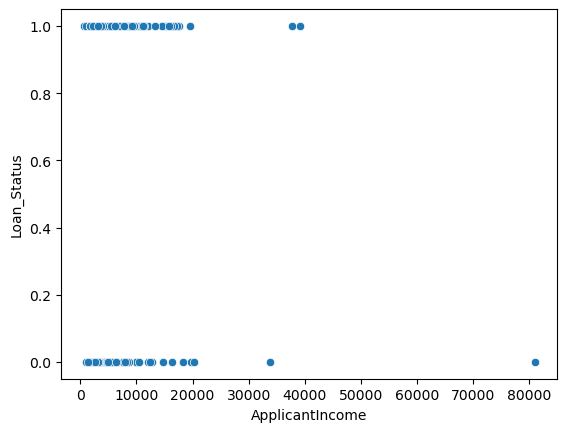

In [67]:
sns.scatterplot(x=train_X['ApplicantIncome'],y=train_y)

In [68]:
reg1=LinearRegression()

In [69]:
reg1.fit(train_X[['ApplicantIncome']],train_y)

LinearRegression()

In [70]:
reg1.intercept_

0.7503871262497117

In [71]:
reg1.coef_

array([-6.99927578e-06])

# Loan status prediction for applicant income
# y= -6.99927578e-06[applicant income] +  0.7503871262497117

In [72]:
train1_predict=reg1.predict(train_X[['ApplicantIncome']])

In [73]:
train1_predict

array([0.68513288, 0.73471575, 0.72415384, 0.70547277, 0.51348964,
       0.73461776, 0.72290097, 0.73021521, 0.72831841, 0.72029024,
       0.72201906, 0.72256501, 0.72337692, 0.70349198, 0.70839147,
       0.73143309, 0.67456397, 0.70664165, 0.67753866, 0.7178265 ,
       0.72370589, 0.71953432, 0.72396486, 0.64761676, 0.70611671,
       0.73204902, 0.71574071, 0.71851242, 0.71667161, 0.72612764,
       0.73358886, 0.72588966, 0.73113912, 0.72868937, 0.63664889,
       0.72913732, 0.73150308, 0.71265403, 0.66639582, 0.73187404,
       0.72959228, 0.70966534, 0.71612567, 0.72152211, 0.7361716 ,
       0.73962224, 0.73055818, 0.71830945, 0.72828341, 0.71539075,
       0.72113015, 0.72658959, 0.71619566, 0.73753646, 0.67748267,
       0.72617663, 0.72654759, 0.73442178, 0.72658959, 0.7235589 ,
       0.7293893 , 0.47638648, 0.72413984, 0.73300792, 0.72827641,
       0.71991228, 0.72105316, 0.73281894, 0.72343991, 0.73741747,
       0.72507075, 0.72658959, 0.73289594, 0.72830441, 0.70022

In [74]:
test1_predict=reg1.predict(test_X[['ApplicantIncome']])

In [75]:
test1_predict

array([0.70746057, 0.7293893 , 0.71166713, 0.73428179, 0.73101313,
       0.7264636 , 0.73484173, 0.73405782, 0.72466479, 0.73629058,
       0.71637065, 0.71772851, 0.73172706, 0.69439292, 0.73358886,
       0.73331589, 0.73489773, 0.73288894, 0.72337692, 0.73218901,
       0.70263807, 0.72637961, 0.73079615, 0.72308995, 0.73668254,
       0.72822742, 0.71814846, 0.72446181, 0.72768148, 0.72005926,
       0.7119751 , 0.69206216, 0.72602265, 0.73772544, 0.69206216,
       0.74074212, 0.6462379 , 0.72247401, 0.72239002, 0.72880836,
       0.72886435, 0.73374285, 0.73137009, 0.72766748, 0.6888005 ,
       0.73654956, 0.62324528, 0.70641068, 0.69002537, 0.72280298,
       0.70664165, 0.69388897, 0.7390133 , 0.72326493, 0.72378988,
       0.73218901, 0.73334389, 0.69731162, 0.71754652, 0.67339509,
       0.73382684, 0.72029024, 0.7332109 , 0.68623176, 0.73181805,
       0.71807847, 0.73016622, 0.66989545, 0.72851439, 0.70413591,
       0.71714057, 0.71141516, 0.69043133, 0.72581967, 0.73523

Text(0, 0.5, 'Loan_Status')

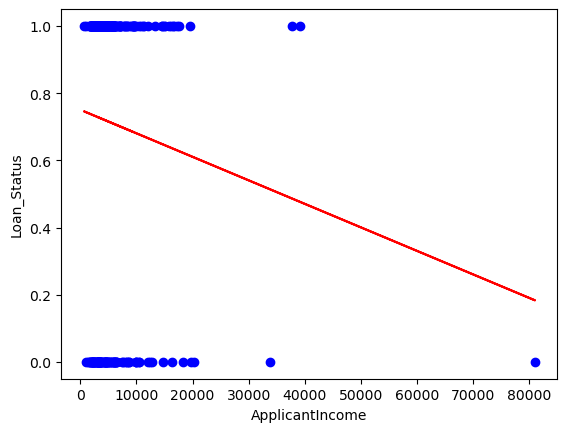

In [76]:
plt.scatter(train_X['ApplicantIncome'], train_y, color = 'blue')
plt.plot(train_X['ApplicantIncome'], reg1.predict(train_X[['ApplicantIncome']]), color = 'red')
plt.xlabel("ApplicantIncome")
plt.ylabel('Loan_Status')

Text(0, 0.5, 'Loan_Status')

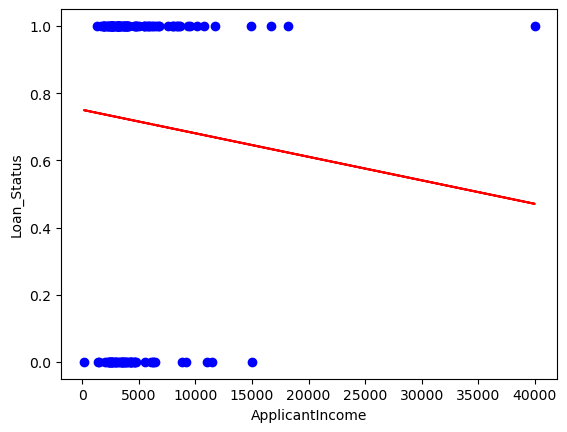

In [77]:
plt.scatter(test_X['ApplicantIncome'], test_y, color = 'blue')
plt.plot(test_X['ApplicantIncome'], reg1.predict(test_X[['ApplicantIncome']]), color = 'red')
plt.xlabel("ApplicantIncome")
plt.ylabel('Loan_Status')

Text(0, 0.5, 'Loan_Status')

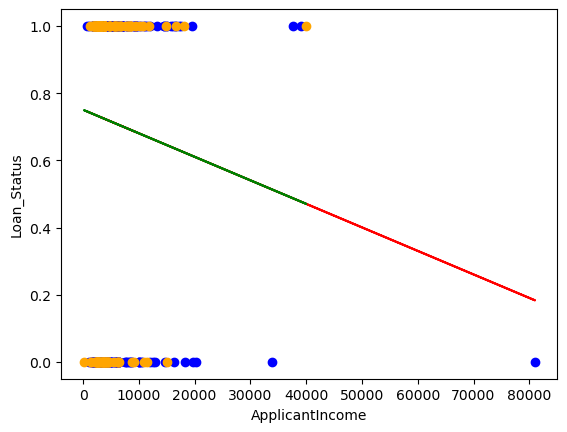

In [78]:
plt.scatter(train_X['ApplicantIncome'], train_y, color = 'blue')
plt.plot(train_X['ApplicantIncome'], reg1.predict(train_X[['ApplicantIncome']]), color = 'red')
plt.scatter(test_X['ApplicantIncome'], test_y, color = 'orange')
plt.plot(test_X['ApplicantIncome'], reg1.predict(test_X[['ApplicantIncome']]), color = 'green')

plt.xlabel("ApplicantIncome")
plt.ylabel('Loan_Status')

In [79]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)

In [80]:
print("TRAIN ERROR")
returnError(train_y, reg1.predict(train_X[['ApplicantIncome']]))

TRAIN ERROR
MSE =  0.2034813939288321
RMSE =  0.45108911971896654
MAE =  0.4069627878576642
MAPE =  916398729874717.5
R2 Score =  0.00909134068112738


In [81]:
print("TEST ERROR")
returnError(test_y, reg1.predict(test_X[['ApplicantIncome']]))

TEST ERROR
MSE =  0.2375548226043602
RMSE =  0.48739596080021036
MAE =  0.43985764361409757
MAPE =  1149408838060275.5
R2 Score =  -0.038569850627032


train error < test error which means it is overfitting

# multiple linear regression

In [82]:
regML=LinearRegression()

In [83]:
regML.fit(train_X,train_y)

LinearRegression()

In [84]:
regML.intercept_

0.2816528344442803

In [85]:
regML.coef_

array([-2.55386564e-06, -1.39060278e-05, -5.95860220e-04, -7.65913121e-05,
        6.77361531e-01])

In [86]:
trainML_predict = regML.predict(train_X)

In [87]:
trainML_predict

array([ 0.57631824,  0.81435447,  0.83312973,  0.83528972,  0.6900797 ,
        0.83187205,  0.8435513 ,  0.81597068,  0.82185048,  0.77685625,
        0.11584721,  0.85332141,  0.80487052,  0.75754267,  0.83210201,
        0.85049885,  0.76434417,  0.83304909,  0.75053306,  0.85401629,
        0.85496981,  0.84868083,  0.85625603,  0.68359892,  0.81101275,
        0.80445823,  0.84431733,  0.80857477,  0.84858747,  0.82830167,
        0.82665393,  0.82700161,  0.83027953,  0.83672387,  0.09817448,
        0.11735982,  0.82357136,  0.84021177,  0.60524844,  0.12798503,
        0.79923836,  0.7769078 ,  0.85816258,  0.85238543,  0.82703679,
        0.88982175,  0.82330451,  0.85300078,  0.82788972,  0.7841711 ,
        0.78025247,  0.13734094,  0.89036457,  0.40258691,  0.11605304,
        0.92609308,  0.78802929,  0.85828392,  0.86615163,  0.8561079 ,
        0.85669517,  0.69390846,  0.84534133,  0.17360547,  0.87374945,
        0.83928497,  0.84923502,  0.82782164,  0.84835346,  0.81

In [88]:
testML_predict = regML.predict(test_X)

In [89]:
testML_predict

array([ 0.66840298,  0.15447394,  0.75614894,  0.87916582,  0.8048973 ,
        0.84703813,  0.21265621,  0.81083547,  0.85433787,  0.81829067,
        0.83300518,  0.83908403,  0.79273788,  0.79183852,  0.16007429,
        0.80199786,  0.88646301,  0.88513419,  0.86438354,  0.15174571,
        0.83000273,  0.15166756,  0.820268  ,  0.867854  ,  0.81450825,
        0.90190499,  0.87141371,  0.82266669,  0.87548794,  0.82074729,
        0.84294335,  0.7678028 ,  0.85500874,  0.84721767,  0.74331927,
        0.80225637,  0.83623739,  0.90065462,  0.64065485,  0.81834127,
        0.80716682,  0.89795883,  0.90253746,  0.82121809,  0.07787656,
        0.88273518,  0.810568  ,  0.05209022,  0.82003792,  0.80904696,
        0.83920972,  0.75673661,  0.84501631,  0.88162263,  0.06560777,
        0.83640895,  0.88053331,  0.80064967,  0.85629757,  0.85389257,
        0.8091659 ,  0.16206135,  0.10751931,  0.76264287,  0.17289975,
        0.83980758,  0.23367457,  0.05429448,  0.78624516,  0.84

In [90]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)
    

In [91]:
print("TRAIN ERROR")
returnError(train_y, regML.predict(train_X))

TRAIN ERROR
MSE =  0.14259040736553028
RMSE =  0.37761145025744425
MAE =  0.28780449291065013
MAPE =  653986101549951.6
R2 Score =  0.30561676099129087


In [92]:
print("TEST ERROR")
returnError(test_y, regML.predict(test_X))

TEST ERROR
MSE =  0.18398847607436788
RMSE =  0.4289387789351388
MAE =  0.32246573898937414
MAPE =  879546533644474.0
R2 Score =  0.19561774406955668


train error < test error

In [93]:
test_y

536    1
358    0
474    1
282    1
545    1
      ..
501    1
422    1
154    1
410    0
229    1
Name: Loan_Status, Length: 144, dtype: int64

In [94]:
LMLR=pd.DataFrame(sample['Loan_ID'])

In [95]:
LMLR

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [96]:
LMLR['Loan_Status']=pd.DataFrame(test_y)

In [97]:
LMLR

,Loan_ID,Loan_Status
0,LP001015,NaN
1,LP001022,NaN
2,LP001031,NaN
3,LP001035,1.0
4,LP001051,NaN
...,...,...
362,LP002971,1.0
363,LP002975,NaN
364,LP002980,1.0
365,LP002986,0.0


In [98]:
LMLR.isna().sum()

Loan_ID          0
Loan_Status    282
dtype: int64

In [99]:
LMLR['Loan_Status'].value_counts()

1.0    54
0.0    31
Name: Loan_Status, dtype: int64

In [100]:
LMLR['Loan_Status']=LMLR['Loan_Status'].fillna(LMLR['Loan_Status'].mode()[0])

In [101]:
LMLR.isna().sum()

Loan_ID        0
Loan_Status    0
dtype: int64

In [102]:
LMLR

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0
...,...,...
362,LP002971,1.0
363,LP002975,1.0
364,LP002980,1.0
365,LP002986,0.0


In [103]:
LMLR['Loan_Status']=LMLR['Loan_Status'].replace({1:'Y',0:'N'})

In [104]:
LMLR

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,N


In [105]:
LMLR.to_csv('LinearandMultipleLinearReg.csv',index=False)

# public score after linear regression and
# multiple linear regression: 0.673611111111111 (highly overfitting)

<Axes: ylabel='Frequency'>

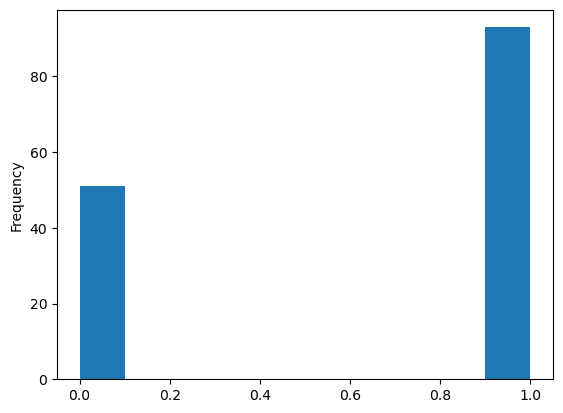

In [106]:
test_y.plot(kind='hist')

<Axes: ylabel='Frequency'>

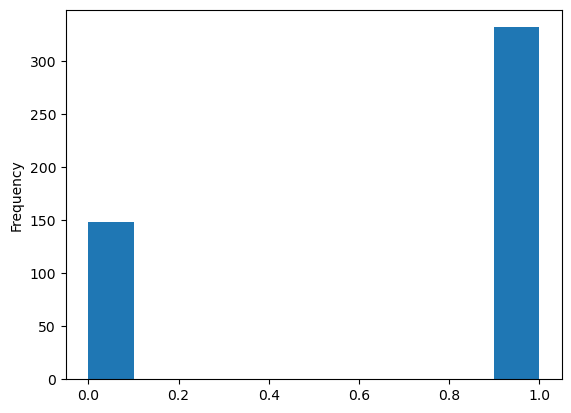

In [107]:
train['Loan_Status'].plot(kind='hist')

In [108]:
train_predict.shape

(336,)

In [109]:
y.shape

(480,)

In [110]:
np.sqrt(mean_squared_error(y.head(336),train_predict))

0.47253851264715563

In [111]:
model.coef_

array([ 3.42828597e-07, -6.29296946e-06, -2.54510529e-04, -1.63775326e-04,
        6.91217540e-01])

<Axes: >

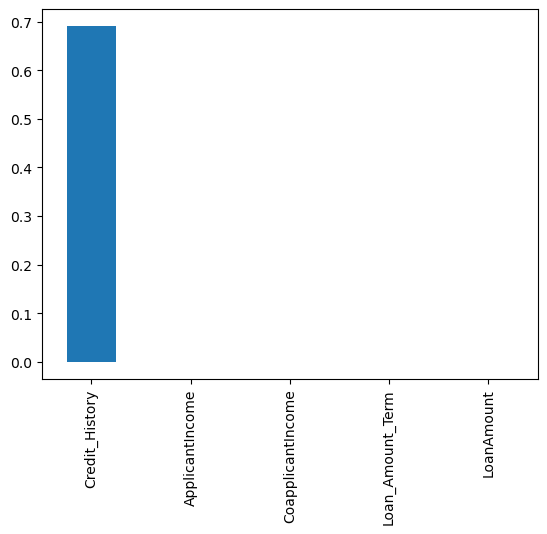

In [112]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False).plot(kind = 'bar')

In [113]:
pd.Series(model.coef_,X.columns).sort_values(ascending=False)

Credit_History       6.912175e-01
ApplicantIncome      3.428286e-07
CoapplicantIncome   -6.292969e-06
Loan_Amount_Term    -1.637753e-04
LoanAmount          -2.545105e-04
dtype: float64

In [114]:
np.sqrt(mean_squared_error(y.head(336),trainML_predict))

0.5276636226952361

<Axes: >

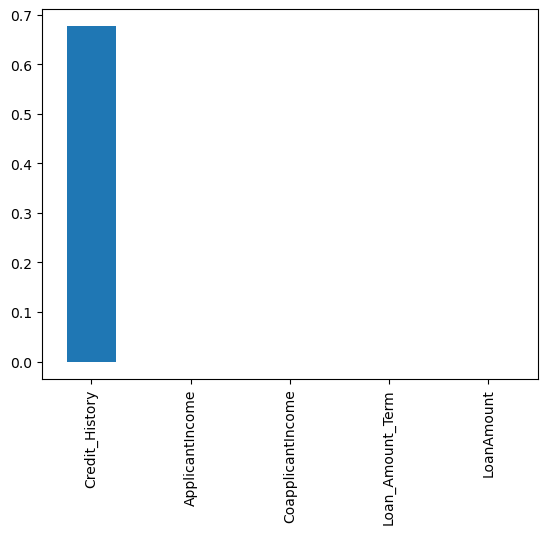

In [115]:
pd.Series(regML.coef_, X.columns).sort_values(ascending = False).plot(kind = 'bar')

In [116]:
pd.Series(regML.coef_, X.columns).sort_values(ascending = False)

Credit_History       0.677362
ApplicantIncome     -0.000003
CoapplicantIncome   -0.000014
Loan_Amount_Term    -0.000077
LoanAmount          -0.000596
dtype: float64

# Polynomial regression

In [117]:
poly=PolynomialFeatures(degree=2, include_bias=False)

In [118]:
trainX_poly=poly.fit_transform(X)
testX_poly=poly.transform(test_X)

In [119]:
modelP=LinearRegression()

In [120]:
modelP.fit(trainX_poly,y)

LinearRegression()

In [121]:
train_predictpoly=modelP.predict(trainX_poly)
test_predictpoly=modelP.predict(testX_poly)

In [122]:
test_predictpoly

array([ 0.79955583, -0.09813529,  0.85990539,  0.7770799 ,  0.83901228,
        0.7542801 ,  0.01377139,  0.86587856,  0.7719233 ,  0.90328534,
        0.79486454,  0.75390993,  0.94277488,  0.73280596,  0.12882014,
        0.90378358,  0.76593435,  0.7684577 ,  0.76434492,  0.12925954,
        0.75232176,  0.09969896,  0.8636361 ,  0.76783851,  0.87170776,
        0.80366559,  0.7800825 ,  0.85058428,  0.76816892,  0.87681811,
        0.75797558,  0.79946966,  0.47705418,  0.86814611,  0.7633142 ,
        0.85272211,  0.87096074,  0.88948394,  0.76026244,  0.85614027,
        0.85840612,  0.78187664,  0.77339954,  0.81876515,  0.11494072,
        0.84758483,  0.83390199,  0.15682423,  0.74702376,  0.85229126,
        0.75824764,  0.74905132,  0.86033294,  0.78386321,  0.17759625,
        0.90265235,  0.76343554,  0.73675785,  0.76412222,  0.84919385,
        0.87004618,  0.04357251,  0.14865398,  0.7248751 ,  0.02000019,
        0.75407939, -0.00152039,  0.11289562,  0.85154072,  0.92

In [123]:
test_predictpoly.shape

(144,)

In [124]:
Polypred=pd.DataFrame(sample['Loan_ID'])

In [125]:
Polypred

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [126]:
Polypred['Loan_Status']=pd.DataFrame(test_predictpoly)
Polypred

,Loan_ID,Loan_Status
0,LP001015,0.799556
1,LP001022,-0.098135
2,LP001031,0.859905
3,LP001035,0.777080
4,LP001051,0.839012
...,...,...
362,LP002971,NaN
363,LP002975,NaN
364,LP002980,NaN
365,LP002986,NaN


In [127]:
imp=SimpleImputer()

In [128]:
imp_data=imp.fit_transform(Polypred[['Loan_Status']])

In [129]:
Polypred['Loan_Status']=imp_data
Polypred

,Loan_ID,Loan_Status
0,LP001015,0.799556
1,LP001022,-0.098135
2,LP001031,0.859905
3,LP001035,0.777080
4,LP001051,0.839012
...,...,...
362,LP002971,0.699276
363,LP002975,0.699276
364,LP002980,0.699276
365,LP002986,0.699276


In [130]:
Polypred['Loan_Status']=Polypred['Loan_Status'].round()

In [131]:
Polypred['Loan_Status'].unique()

array([ 1., -0.])

In [132]:
Polypred['Loan_Status']=Polypred['Loan_Status'].replace({1.0:'Y',-0.0:'N'})

In [133]:
Polypred['Loan_Status'].value_counts()

Y    344
N     23
Name: Loan_Status, dtype: int64

In [134]:
Polypred

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [135]:
Polypred=Polypred.reset_index().drop(columns='index')

In [136]:
Polypred.shape

(367, 2)

In [137]:
Polypred.to_csv('Polypredict1_Loanpred.csv')

#  Public score for using polynomial regression degree 2: 0.6875000000

In [138]:
np.sqrt(mean_squared_error(y,train_predictpoly))

0.37246875728127804

Output/End result:
1) the root mean square error has been decreased from 0.5276636226952361 to 0.37246875728127804 ( from multiple linear regression to polynomial regression)  (15.52 % decrease in rmse)
2) the root mean square error has been decreased from 0.47253851264715563 to 0.37246875728127804 ( from linear regression to 
polynomial regression) (10.01% decrease in rmse)

In [139]:
0.5276636226952361 - 0.37246875728127804

0.1551948654139581

In [140]:
0.47253851264715563 - 0.37246875728127804 

0.10006975536587759

In [141]:
modelP.coef_

array([ 1.15574056e-04,  3.76025898e-05, -3.52343197e-04,  5.11038471e-03,
        4.42225500e-01,  2.89187452e-10, -2.72520159e-09, -1.76056636e-07,
       -2.27682888e-07, -1.24519838e-05, -2.64347859e-09, -2.81584807e-07,
        1.83261667e-07, -6.87515760e-06,  5.91331315e-06, -9.43016730e-07,
       -2.59284531e-04, -7.75169668e-06, -2.37239497e-04,  4.42225500e-01])

# Regularisation

# Ridge regression

In [142]:
Xrid=data_preprocessed.drop(columns=['Loan_Status'])

In [143]:
yrid=data_preprocessed['Loan_Status']

In [144]:
modelR=Ridge(alpha=10)

In [145]:
modelR.fit(Xrid,yrid)

Ridge(alpha=10)

In [146]:
trainR_predict = modelR.predict(Xrid)

In [147]:
test_Xrid=data_preprocessed.drop(columns=['Loan_Status'])

In [148]:
testR_predict = modelR.predict(test_Xrid)

In [149]:
testR_predict

array([ 7.26819496e-01,  8.24725182e-01,  7.32829401e-01,  7.21487407e-01,
        7.34704969e-01,  7.50955554e-01,  3.28579245e-01,  8.16476531e-01,
        6.88734945e-01,  8.65054230e-01,  7.42613293e-01,  6.78376686e-01,
        9.11834517e-01,  7.27805605e-01,  1.18805971e-01,  7.22888442e-01,
        1.88212790e-01,  6.37803730e-01,  2.74713661e-01,  8.85775229e-01,
        9.07780410e-01,  7.81841424e-01,  7.00697643e-01,  7.48598743e-01,
        6.44636925e-01,  9.16791905e-01,  6.07545185e-01,  8.51979083e-01,
        6.36861133e-01,  7.65886082e-01,  7.46245829e-01,  7.48376811e-01,
        9.02433665e-01,  8.03382679e-01,  8.09184721e-01,  1.57554895e-01,
        7.55643573e-01,  8.04497992e-01,  7.86127645e-01,  7.89984579e-01,
        8.44995987e-01,  5.83131125e-02,  9.60288269e-01,  9.24514327e-01,
        7.65011428e-01,  7.26460158e-01,  7.50543782e-01,  7.83341835e-01,
        8.40196009e-01,  1.07320411e-01,  2.13285193e-01,  8.30226945e-01,
        8.90105152e-02,  

In [150]:
testR_predict.shape

(480,)

In [151]:
Testrid=pd.DataFrame(testR_predict)

In [152]:
Testrid=Testrid.head(367)
Testrid

,0
0,0.726819
1,0.824725
2,0.732829
3,0.721487
4,0.734705
...,...
362,0.274995
363,0.695009
364,0.220144
365,0.800587


In [153]:
Testrid=Testrid.rename(columns={0:'Loan_Status'})
Testrid

,Loan_Status
0,0.726819
1,0.824725
2,0.732829
3,0.721487
4,0.734705
...,...
362,0.274995
363,0.695009
364,0.220144
365,0.800587


In [154]:
Testrid['Loan_ID']=pd.DataFrame(sample['Loan_ID'])
Testrid

,Loan_Status,Loan_ID
0,0.726819,LP001015
1,0.824725,LP001022
2,0.732829,LP001031
3,0.721487,LP001035
4,0.734705,LP001051
...,...,...
362,0.274995,LP002971
363,0.695009,LP002975
364,0.220144,LP002980
365,0.800587,LP002986


In [155]:
Testrid['Loan_Status']=Testrid['Loan_Status'].round()
Testrid

,Loan_Status,Loan_ID
0,1.0,LP001015
1,1.0,LP001022
2,1.0,LP001031
3,1.0,LP001035
4,1.0,LP001051
...,...,...
362,0.0,LP002971
363,1.0,LP002975
364,0.0,LP002980
365,1.0,LP002986


In [156]:
Testrid.isna().sum()

Loan_Status    0
Loan_ID        0
dtype: int64

In [157]:
Testrid['Loan_Status']=Testrid['Loan_Status'].replace({1.0:'Y',0.0:'N'})
Testrid

,Loan_Status,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051
...,...,...
362,N,LP002971
363,Y,LP002975
364,N,LP002980
365,Y,LP002986


In [158]:
Testrid.to_csv('Ridgeloan_pred.csv',index=False)

# Public score for ridge reg: 0.6805555555555556

In [159]:
model.coef_

array([ 3.42828597e-07, -6.29296946e-06, -2.54510529e-04, -1.63775326e-04,
        6.91217540e-01])

<Axes: >

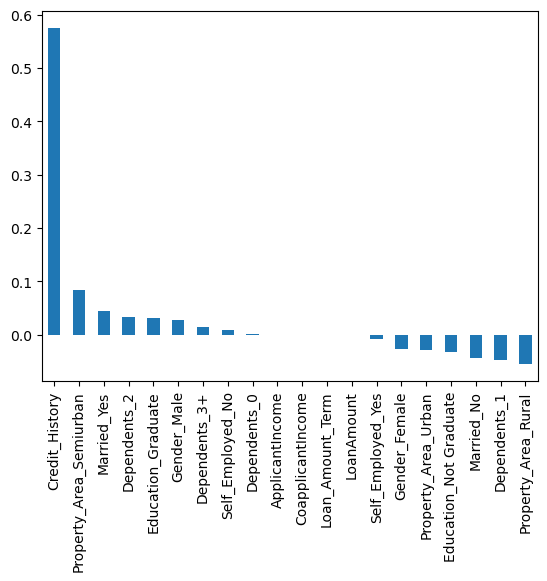

In [160]:
pd.Series(modelR.coef_, Xrid.columns).sort_values(ascending = False).plot(kind='bar')

In [161]:
pd.Series(modelR.coef_, Xrid.columns).sort_values(ascending = False)

Credit_History             5.749833e-01
Property_Area_Semiurban    8.303225e-02
Married_Yes                4.451957e-02
Dependents_2               3.276607e-02
Education_Graduate         3.182529e-02
Gender_Male                2.705411e-02
Dependents_3+              1.384822e-02
Self_Employed_No           8.110741e-03
Dependents_0               6.742323e-04
ApplicantIncome            4.181157e-07
CoapplicantIncome         -9.112264e-06
Loan_Amount_Term          -1.196215e-04
LoanAmount                -4.223262e-04
Self_Employed_Yes         -8.110741e-03
Gender_Female             -2.705411e-02
Property_Area_Urban       -2.806574e-02
Education_Not Graduate    -3.182529e-02
Married_No                -4.451957e-02
Dependents_1              -4.728852e-02
Property_Area_Rural       -5.496651e-02
dtype: float64

In [162]:
np.sqrt(mean_squared_error(yrid,trainR_predict))

0.38166811069369266

# ELASTIC NET

In [163]:
Xel = data_preprocessed.drop(columns=['Loan_Status'])
yel=data_preprocessed['Loan_Status']

In [164]:
modelE = ElasticNet(alpha = 10)

In [165]:
modelE.fit(Xel,yel)

ElasticNet(alpha=10)

In [166]:
trainE_predict = modelE.predict(Xel)

In [167]:
test_Xel = data_preprocessed.drop(columns=['Loan_Status'])


In [168]:
testE_predict = modelE.predict(test_Xel)

In [169]:
testE_predict

array([0.69530151, 0.71471258, 0.69542015, 0.70324075, 0.66830221,
       0.70383452, 0.69239465, 0.69734848, 0.57992733, 0.70774723,
       0.64263101, 0.6939421 , 0.71159739, 0.70725589, 0.71276236,
       0.70749679, 0.696893  , 0.65358694, 0.69931464, 0.68962751,
       0.69552426, 0.70081217, 0.72067028, 0.71407398, 0.70824246,
       0.69803443, 0.65181131, 0.69923828, 0.64638815, 0.69707723,
       0.71241821, 0.70855663, 0.69042211, 0.70458295, 0.70392523,
       0.68559878, 0.69073683, 0.7042494 , 0.71438372, 0.71000913,
       0.70853308, 0.68220906, 0.70549196, 0.70393878, 0.69382556,
       0.67535659, 0.68802259, 0.68299983, 0.71460168, 0.68565672,
       0.71025386, 0.6635863 , 0.693982  , 0.68507702, 0.69903441,
       0.70974145, 0.68675877, 0.70240588, 0.7128006 , 0.69033355,
       0.71184462, 0.66976943, 0.69559178, 0.67864224, 0.71147752,
       0.70425324, 0.71093452, 0.69471752, 0.69786344, 0.69342851,
       0.66749604, 0.68918517, 0.652202  , 0.6975472 , 0.71038

In [170]:
testE_predict.shape

(480,)

In [171]:
Test_el=pd.DataFrame(testE_predict)
Test_el

,0
0,0.695302
1,0.714713
2,0.695420
3,0.703241
4,0.668302
...,...
475,0.715095
476,0.710483
477,0.693192
478,0.697187


In [172]:
Test_el=pd.DataFrame(Test_el.head(367))
Test_el

,0
0,0.695302
1,0.714713
2,0.695420
3,0.703241
4,0.668302
...,...
362,0.710254
363,0.703241
364,0.700176
365,0.687904


In [173]:
Test_el=Test_el.rename(columns={0:'Loan_Status'})
Test_el

,Loan_Status
0,0.695302
1,0.714713
2,0.695420
3,0.703241
4,0.668302
...,...
362,0.710254
363,0.703241
364,0.700176
365,0.687904


In [174]:
Test_el['Loan_Status']=Test_el['Loan_Status'].round()
Test_el

,Loan_Status
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
362,1.0
363,1.0
364,1.0
365,1.0


In [175]:
Test_el['Loan_ID']=pd.DataFrame(sample['Loan_ID'])
Test_el

,Loan_Status,Loan_ID
0,1.0,LP001015
1,1.0,LP001022
2,1.0,LP001031
3,1.0,LP001035
4,1.0,LP001051
...,...,...
362,1.0,LP002971
363,1.0,LP002975
364,1.0,LP002980
365,1.0,LP002986


In [176]:
Test_el['Loan_Status']=Test_el['Loan_Status'].replace({0.0:'N',1.0:'Y'})
Test_el

,Loan_Status,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051
...,...,...
362,Y,LP002971
363,Y,LP002975
364,Y,LP002980
365,Y,LP002986


In [177]:
Test_el['Loan_Status'].value_counts()

Y    366
N      1
Name: Loan_Status, dtype: int64

In [178]:
Test_el.to_csv('Elasticloanpred.csv',index=False)

# Public score for elastic net: 0.7083333333333334

In [179]:
modelE.coef_

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -3.82394298e-06,
       -8.85793419e-06, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

<Axes: >

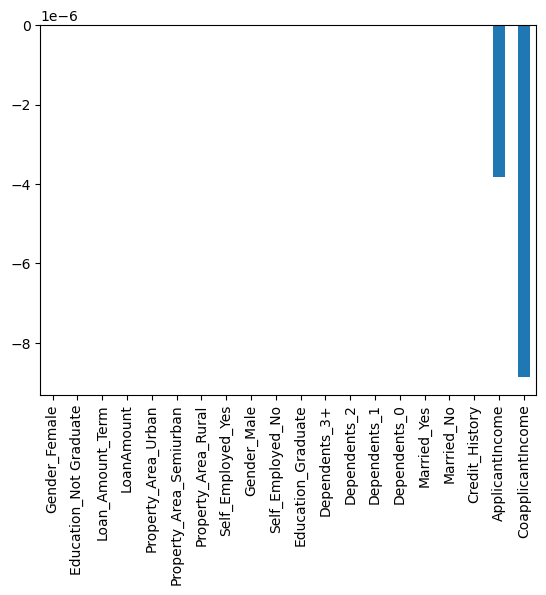

In [180]:
pd.Series(modelE.coef_, Xel.columns).sort_values(ascending = False).plot(kind='bar')

In [181]:
np.sqrt(mean_squared_error(yel,trainE_predict))

0.4607001638729597

# LASSO

In [182]:
Xla=data_preprocessed.drop(columns=['Loan_Status'])

In [183]:
yla=data_preprocessed['Loan_Status']

In [184]:
modelLA=Lasso(alpha=1)

In [185]:
modelLA.fit(Xla,yla)

Lasso(alpha=1)

In [186]:
train_predictLA=modelLA.predict(Xla)

In [187]:
test_Xla = data_preprocessed.drop(columns=['Loan_Status'])

In [188]:
test_predictla = modelLA.predict(test_Xla)

In [189]:
test_predictla

array([0.6963638 , 0.72029679, 0.69623755, 0.70380908, 0.65788594,
       0.70665409, 0.69016002, 0.69468289, 0.56629543, 0.71311049,
       0.63701012, 0.6949424 , 0.72062618, 0.70869588, 0.71773103,
       0.70821642, 0.70145527, 0.63934729, 0.70046784, 0.6876068 ,
       0.69626964, 0.70323574, 0.72817385, 0.71904913, 0.71119606,
       0.69978612, 0.6402056 , 0.69847567, 0.64264109, 0.69929391,
       0.71708548, 0.71524576, 0.69068851, 0.71334617, 0.70414824,
       0.68648823, 0.69016707, 0.70644679, 0.71535289, 0.71222176,
       0.70903534, 0.67293484, 0.70830696, 0.70657777, 0.69372219,
       0.67365572, 0.68716437, 0.68383294, 0.7173542 , 0.68264855,
       0.71209058, 0.65411117, 0.69457652, 0.67319778, 0.70151478,
       0.70991833, 0.68342193, 0.70484531, 0.71733326, 0.68664885,
       0.71373874, 0.66641536, 0.69653132, 0.67463198, 0.71359057,
       0.70041599, 0.71837658, 0.69405689, 0.7000111 , 0.68928835,
       0.66514673, 0.68925652, 0.64905799, 0.70204072, 0.71168

In [190]:
modelLA.coef_

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -3.34004589e-06,
       -8.81907778e-06, -8.62343659e-05, -0.00000000e+00,  0.00000000e+00])

In [191]:
test_predictla.shape

(480,)

In [192]:
Test_lasso=pd.DataFrame(test_predictla)
Test_lasso

,0
0,0.696364
1,0.720297
2,0.696238
3,0.703809
4,0.657886
...,...
475,0.720200
476,0.718845
477,0.685114
478,0.694555


In [193]:
Test_lasso=Test_lasso.rename(columns={0:'Loan_Status'})
Test_lasso

,Loan_Status
0,0.696364
1,0.720297
2,0.696238
3,0.703809
4,0.657886
...,...
475,0.720200
476,0.718845
477,0.685114
478,0.694555


In [194]:
Test_lasso=pd.DataFrame(Test_lasso['Loan_Status'].head(367))
Test_lasso

,Loan_Status
0,0.696364
1,0.720297
2,0.696238
3,0.703809
4,0.657886
...,...
362,0.713643
363,0.703895
364,0.705454
365,0.690435


In [195]:
Test_lasso['Loan_ID']=pd.DataFrame(sample['Loan_ID'])
Test_lasso

,Loan_Status,Loan_ID
0,0.696364,LP001015
1,0.720297,LP001022
2,0.696238,LP001031
3,0.703809,LP001035
4,0.657886,LP001051
...,...,...
362,0.713643,LP002971
363,0.703895,LP002975
364,0.705454,LP002980
365,0.690435,LP002986


In [196]:
Test_lasso['Loan_Status']=Test_lasso['Loan_Status'].round()
Test_lasso

,Loan_Status,Loan_ID
0,1.0,LP001015
1,1.0,LP001022
2,1.0,LP001031
3,1.0,LP001035
4,1.0,LP001051
...,...,...
362,1.0,LP002971
363,1.0,LP002975
364,1.0,LP002980
365,1.0,LP002986


In [197]:
Test_lasso['Loan_Status']=Test_lasso['Loan_Status'].replace({0.0:'N',1.0:'Y'})
Test_lasso

,Loan_Status,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051
...,...,...
362,Y,LP002971
363,Y,LP002975
364,Y,LP002980
365,Y,LP002986


In [198]:
Test_lasso.to_csv('lassoloan_pred.csv',index=False)

#  lasso loan pred public score: 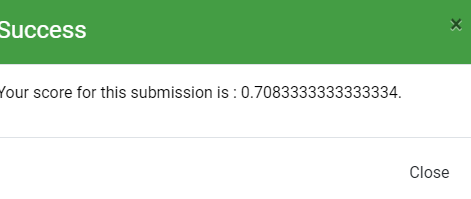

<Axes: >

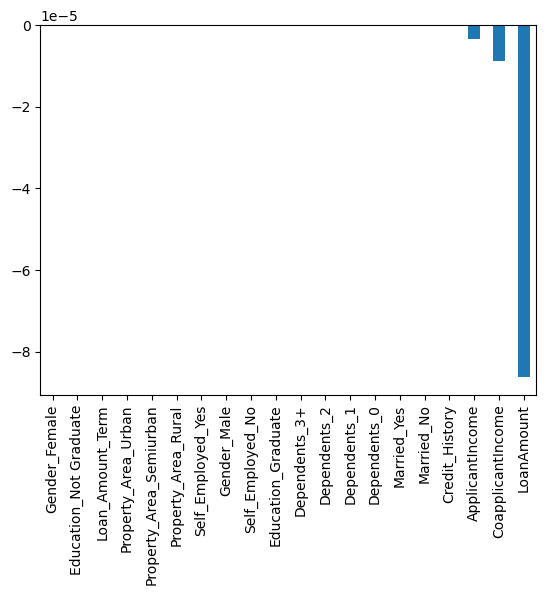

In [199]:
pd.Series(modelLA.coef_, Xla.columns).sort_values(ascending = False).plot(kind='bar')

In [200]:
pd.Series(modelLA.coef_, Xla.columns).sort_values(ascending = False)

Gender_Female             -0.000000
Education_Not Graduate    -0.000000
Loan_Amount_Term          -0.000000
Property_Area_Urban       -0.000000
Property_Area_Semiurban    0.000000
Property_Area_Rural       -0.000000
Self_Employed_Yes         -0.000000
Gender_Male                0.000000
Self_Employed_No           0.000000
Education_Graduate         0.000000
Dependents_3+              0.000000
Dependents_2               0.000000
Dependents_1              -0.000000
Dependents_0              -0.000000
Married_Yes                0.000000
Married_No                -0.000000
Credit_History             0.000000
ApplicantIncome           -0.000003
CoapplicantIncome         -0.000009
LoanAmount                -0.000086
dtype: float64

In [201]:
np.sqrt(mean_squared_error(yla,train_predictLA))

0.46047449024322484